<a href="https://colab.research.google.com/github/FiahIdris/GColab_Learning/blob/main/autoencoder_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# download data MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# encoder
X_train[0].shape

(28, 28)

In [ ]:
encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

In [ ]:
decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

In [ ]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [ ]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 30)                110686    
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            111440    
Total params: 222,126
Trainable params: 222,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

In [ ]:
autoencoder.fit(X_train, X_train,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1525
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0970
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0938
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0914
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872


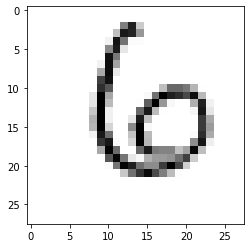

In [ ]:
plt.imshow(X_test[100], cmap='binary')

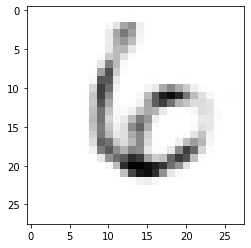

In [ ]:
pred = autoencoder.predict(X_test[100].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')

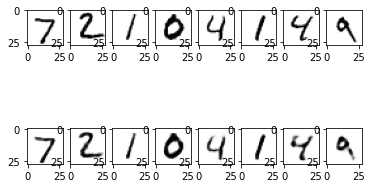

In [ ]:
import matplotlib.pyplot as plt
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test[i].reshape((1,28,28)))
  plt.imshow(X_test[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

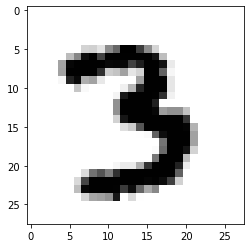

In [ ]:
data_ke =500

plt.imshow(X_test[data_ke], cmap='binary')

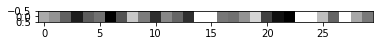

In [ ]:
latent_vector = encoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(latent_vector, cmap="binary")

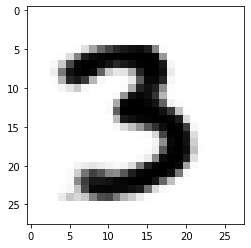

In [ ]:
prediction = autoencoder.predict(X_test[data_ke].reshape((1,28,28)))
plt.imshow(prediction.reshape((28,28)), cmap="binary")

In [ ]:
res = decoder.predict(latent_vector)

In [ ]:
latent_0 = encoder.predict(X_test[6].reshape((1,28,28)))
latent_2 = encoder.predict(X_test[7].reshape((1,28,28)))

In [ ]:
latent_eksperimen = 0.75*latent_0 + 0.25*latent_2

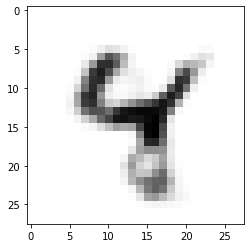

In [ ]:
prediksi = decoder.predict(latent_eksperimen)
plt.imshow(prediksi.reshape((28,28)), cmap="binary")

In [ ]:
# Autoencoder CNN
encoder = tf.keras.models.Sequential([
                tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
                tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(pool_size=2),
])

In [ ]:
decoder = tf.keras.models.Sequential([
                 tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3), strides=2, padding='valid',
                                                 activation='relu',
                                                 input_shape=[3, 3, 64]),
                 tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='relu'),
                 tf.keras.layers.Conv2DTranspose(1, kernel_size=(3,3), strides=2, padding='same',
                                                 activation='sigmoid'),
                 tf.keras.layers.Reshape([28,28])
])

In [ ]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
autoencoder.fit(X_train, X_train,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 6ms/step - loss: 0.1223
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0812
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0767
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0741
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0724
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0714
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0707
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0701
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0696
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0692


# Denoising Autoencoder

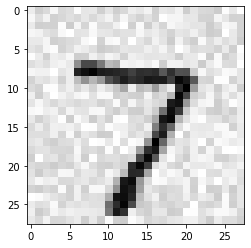

In [ ]:
import numpy as np
noise = np.random.random((28,28))/4
plt.imshow(X_test[0]+ noise, cmap='binary')

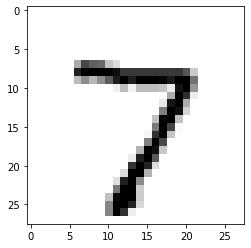

In [ ]:
plt.imshow(X_test[0], cmap='binary')

In [ ]:
encoder = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=[28, 28]),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(30, activation='relu')

])

In [ ]:
decoder = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape([28, 28])
])

In [ ]:
autoencoder = tf.keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

In [ ]:
noise = np.random.random((28,28))/4
X_train_noise = X_train + noise


In [ ]:
X_test_noise = X_test + noise

In [ ]:
autoencoder.fit(X_train_noise, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1573
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1152
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1067
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1021
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0995
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0972
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0953
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0937
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0925
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0916


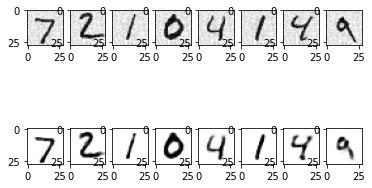

In [ ]:
for i in range(8):
  plt.subplot(2, 8, i+1)
  pred = autoencoder.predict(X_test_noise[i].reshape((1,28,28)))
  plt.imshow(X_test_noise[i], cmap='binary')

  plt.subplot(2, 8, i+8+1)
  plt.imshow(pred.reshape((28,28)), cmap='binary')

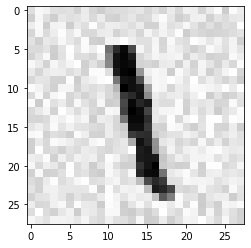

In [ ]:
plt.imshow(X_test_noise[700], cmap='binary')

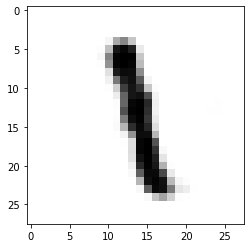

In [ ]:
pred = autoencoder.predict(X_test_noise[700].reshape((1,28,28)))
plt.imshow(pred.reshape((28,28)), cmap='binary')